# Ground State

The hubbard hamiltonian for the non-interacting fermionic system is as follows:

#### $\hat{H} = -t\sum\limits_{\langle{r,r'}\rangle\sigma}\hat{c}^{\dagger}_{r,\sigma}\hat{c}_{r',\sigma} + \frac{U}{2}\sum\limits_{r}\sum\limits_{\sigma\neq\sigma'}\hat{n}_{\sigma}(r)\hat{n}_{\sigma'}(r)$

where $r$ denotes a lattice coordinate and $\sigma$ denotes the "flavor" of a particle. In ferminionic systems, one such "flavor" is a particle's spin (spin-up $\uparrow$ and spin-down $\downarrow$). The operators $\hat{c}^{\dagger}_{r,\sigma}$ and $\hat{c}_{r',\sigma}$ are the creation and destruction operators, while  $\hat{n}_{\sigma}(r)$ and $\hat{n}_{\sigma'}(r)$ are the density operators. We seek to implement a generalization of the Hubbard hamiltonian where a user can arbitrarily construct an $d$-dimensional lattice with $N$ particles and $F$ flavors.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

We intend to construct the lattice in the single-particle Hilbert space:

$\langle{r,\sigma}|\hat{H}|{r',\sigma'}\rangle$

where each lattice site $r$ corresponds to a basis state in the Hamiltonian.

We begin by defining the parameters of the lattice system. This allows us to choose and tune the dimensionality, the total number of particles in the system, and the total number of particles existing in a state of a certain flavor.

In [36]:
D = 2 # dimensionality
d_array = np.empty(dimension,dtype=np.int64)
# for d in range(dimension):
    # d_array = int(input(f"How many sites in direction {d}?"))
d_array[0] = 3
d_array[1] = 3
L = np.prod(d_array)
print(f"{D}-dimensional lattice generated with {L} sites")

F = 3 # total flavors
N = np.empty(F,dtype=np.int64)
N[0] = 2
N[1] = 1
N[2] = 2
print(f"{np.sum(N)} particles generated")

ibc = 0 # 0 = periodic boundary conditions & 1 = open boundary conditions

M = F * L
print(f"The dimensionality of the single particle Hilbert space is {M}")

2-dimensional lattice generated with 9 sites
5 particles generated
The dimensionality of the single particle Hilbert space is 27


We will construct a Hamiltonian, which will have $L^2$ components. We will call this `Honey`.

In [37]:
Honey = np.zeros(L*L,dtype=np.complex128)

In the non-interacting system, the potential energy component of $\hat{H}$ will be neglected. Because our hamiltonian exists in a hilbert space of basis $|r\rangle$, the kinetic energy can be represented through nearest neighbor considerations. We need to implement a mechanism for modifying $\hat{H}$ to reflect the possible state transitions through "hopping".

We start by definining two helper functions: `coor` takes in an index and returns a coordinate, and `coor_to_index` takes in a coordinate and returns an index.

In [41]:
def coor(index,d,n,Ns):
    den=Ns; coor=np.empty(d, dtype=int)
    for i in range(d-1, -1, -1):
        den/=n[i]
        coor[i]=index/den
        index%=den
    return coor

def coor_to_index(coor, d, d_array):
    index = 0
    m = 1
    #print(d-1)
    for dim in range(d):
        index = index + m*coor[dim]
        m = m*d_array[dim] 
    return index 

The system needs to consider whether periodic or open boundary conditions are enforced. Periodic boundaries means that the lattice "wraps" itself to a starting point, connecting the ends. Open boundaries means that the boundaries are not connected.

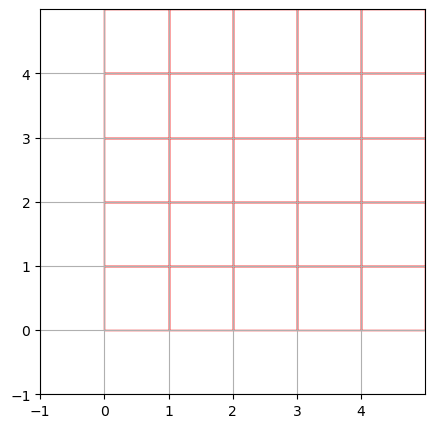

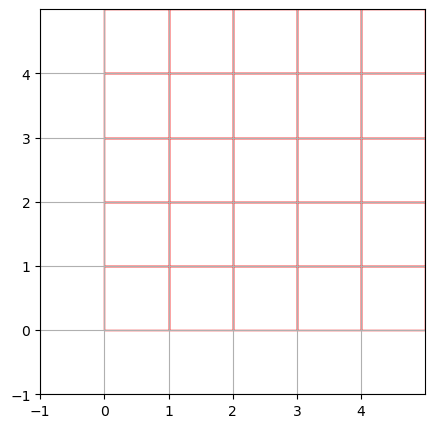

In [40]:
import matplotlib.patches as patches

def draw_lattice(rows, cols, boundary_type='Open'):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.xlim(-1, cols)
    plt.ylim(-1, rows)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(-1, cols, 1))
    ax.set_yticks(np.arange(-1, rows, 1))
    plt.grid(True)
    
    # Drawing the cells
    for x in range(cols):
        for y in range(rows):
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

# Draw lattice with Open Boundary Conditions
draw_lattice(5, 5, 'Open')

# Draw lattice with Periodic Boundary Conditions
draw_lattice(5, 5, 'Periodic')
